In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
%precision 2

'%.2f'

In [2]:
data = pd.read_csv('../Tables/model_data.csv') #load data

data.head(10) #visualize first ten records

,GRD_INSPIR,ndvi,lst,WATER,ROADS,URBAN_GREENERY,OTHER,EXTRACTION_SITES,OPEN_SPACE_COMMERCIAL,CROPLAND,...,elevation,dist_coast,x,y,doy,year,building surface,impervious surface,pervious surface,BUILT_UP
0,1kmN6413E0624,0.806092,28.21,0.0375,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,58.740114,98335.109650,624500,6413500,209,2010,0.0000,0.0000,99.9625,0.0000
1,1kmN6557E0579,0.868315,24.71,0.7900,0.0000,0.0,1.5325,0.0000,0.0000,0.0000,...,77.424827,37495.237420,579500,6557500,189,2010,0.0000,0.0000,99.2100,0.0000
2,1kmN6422E0669,0.743125,30.95,0.3125,0.0000,0.0,0.1200,7.8775,0.0000,50.2525,...,94.832608,140303.564400,669500,6422500,219,2010,0.2250,2.0025,97.4600,0.2250
3,1kmN6543E0613,0.557522,23.96,0.0000,0.1600,0.0,1.3025,0.0000,0.9275,96.9575,...,98.910454,60622.467480,613500,6543500,228,2010,0.0000,1.2650,98.7350,0.0000
4,1kmN6571E0605,0.754519,31.79,0.0225,1.0725,0.0,2.7825,0.0000,0.0000,52.5975,...,88.959888,32321.611810,605500,6571500,195,2010,0.1575,3.9375,95.8825,0.1575
5,1kmN6544E0475,0.691767,25.90,66.8325,0.2100,0.0,29.8925,0.0000,0.0000,0.3575,...,0.853841,3052.882948,475500,6544500,185,2010,0.0000,0.2100,32.9575,0.0000
6,1kmN6419E0696,0.827798,29.61,0.0500,0.0000,0.0,0.6625,0.0000,0.0000,37.1175,...,92.517902,167123.078700,696500,6419500,220,2010,0.0525,0.4625,99.4350,0.0525
7,1kmN6570E0489,0.860044,15.63,0.2000,0.0000,0.0,2.0850,0.0000,0.0000,4.4200,...,8.833121,891.632684,489500,6570500,228,2010,0.1675,3.0150,96.6175,0.1675
8,1kmN6532E0650,0.847978,24.62,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,8.3750,...,86.848993,61608.510290,650500,6532500,210,2010,0.0225,0.1900,99.7875,0.0225
9,1kmN6508E0628,0.854092,28.21,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,...,65.625939,91540.732610,628500,6508500,203,2010,0.0000,0.0000,100.0000,0.0000


In [3]:

cols = data.columns

cols

Index(['GRD_INSPIR', 'ndvi', 'lst', 'WATER', 'ROADS', 'URBAN_GREENERY',
       'OTHER', 'EXTRACTION_SITES', 'OPEN_SPACE_COMMERCIAL', 'CROPLAND',
       'AGRICULTURAL_LAND', 'NATURAL_VEGETATION', 'OPEN_SPACE_MIXED_USE',
       'FOREST', 'WETLANDS', 'elevation', 'dist_coast', 'x', 'y', 'doy',
       'year', 'building surface', 'impervious surface', 'pervious surface',
       'BUILT_UP'],
      dtype='object')

In [4]:
data.rename(columns = {'ndvi':'NDVI', 'lst':'LST', 
                              'dist_coast':'DIST_COAST', 
                       'elevation':'ELEVATION','x':'X','y':'Y',
                       'doy':'DOY','year':'Year',
                      'building surface': 'BUILDING SURFACE','impervious surface':'IMPERVIOUS SURFACE',
                       'pervious surface':'PERVIOUS SURFACE'}, inplace = True) 

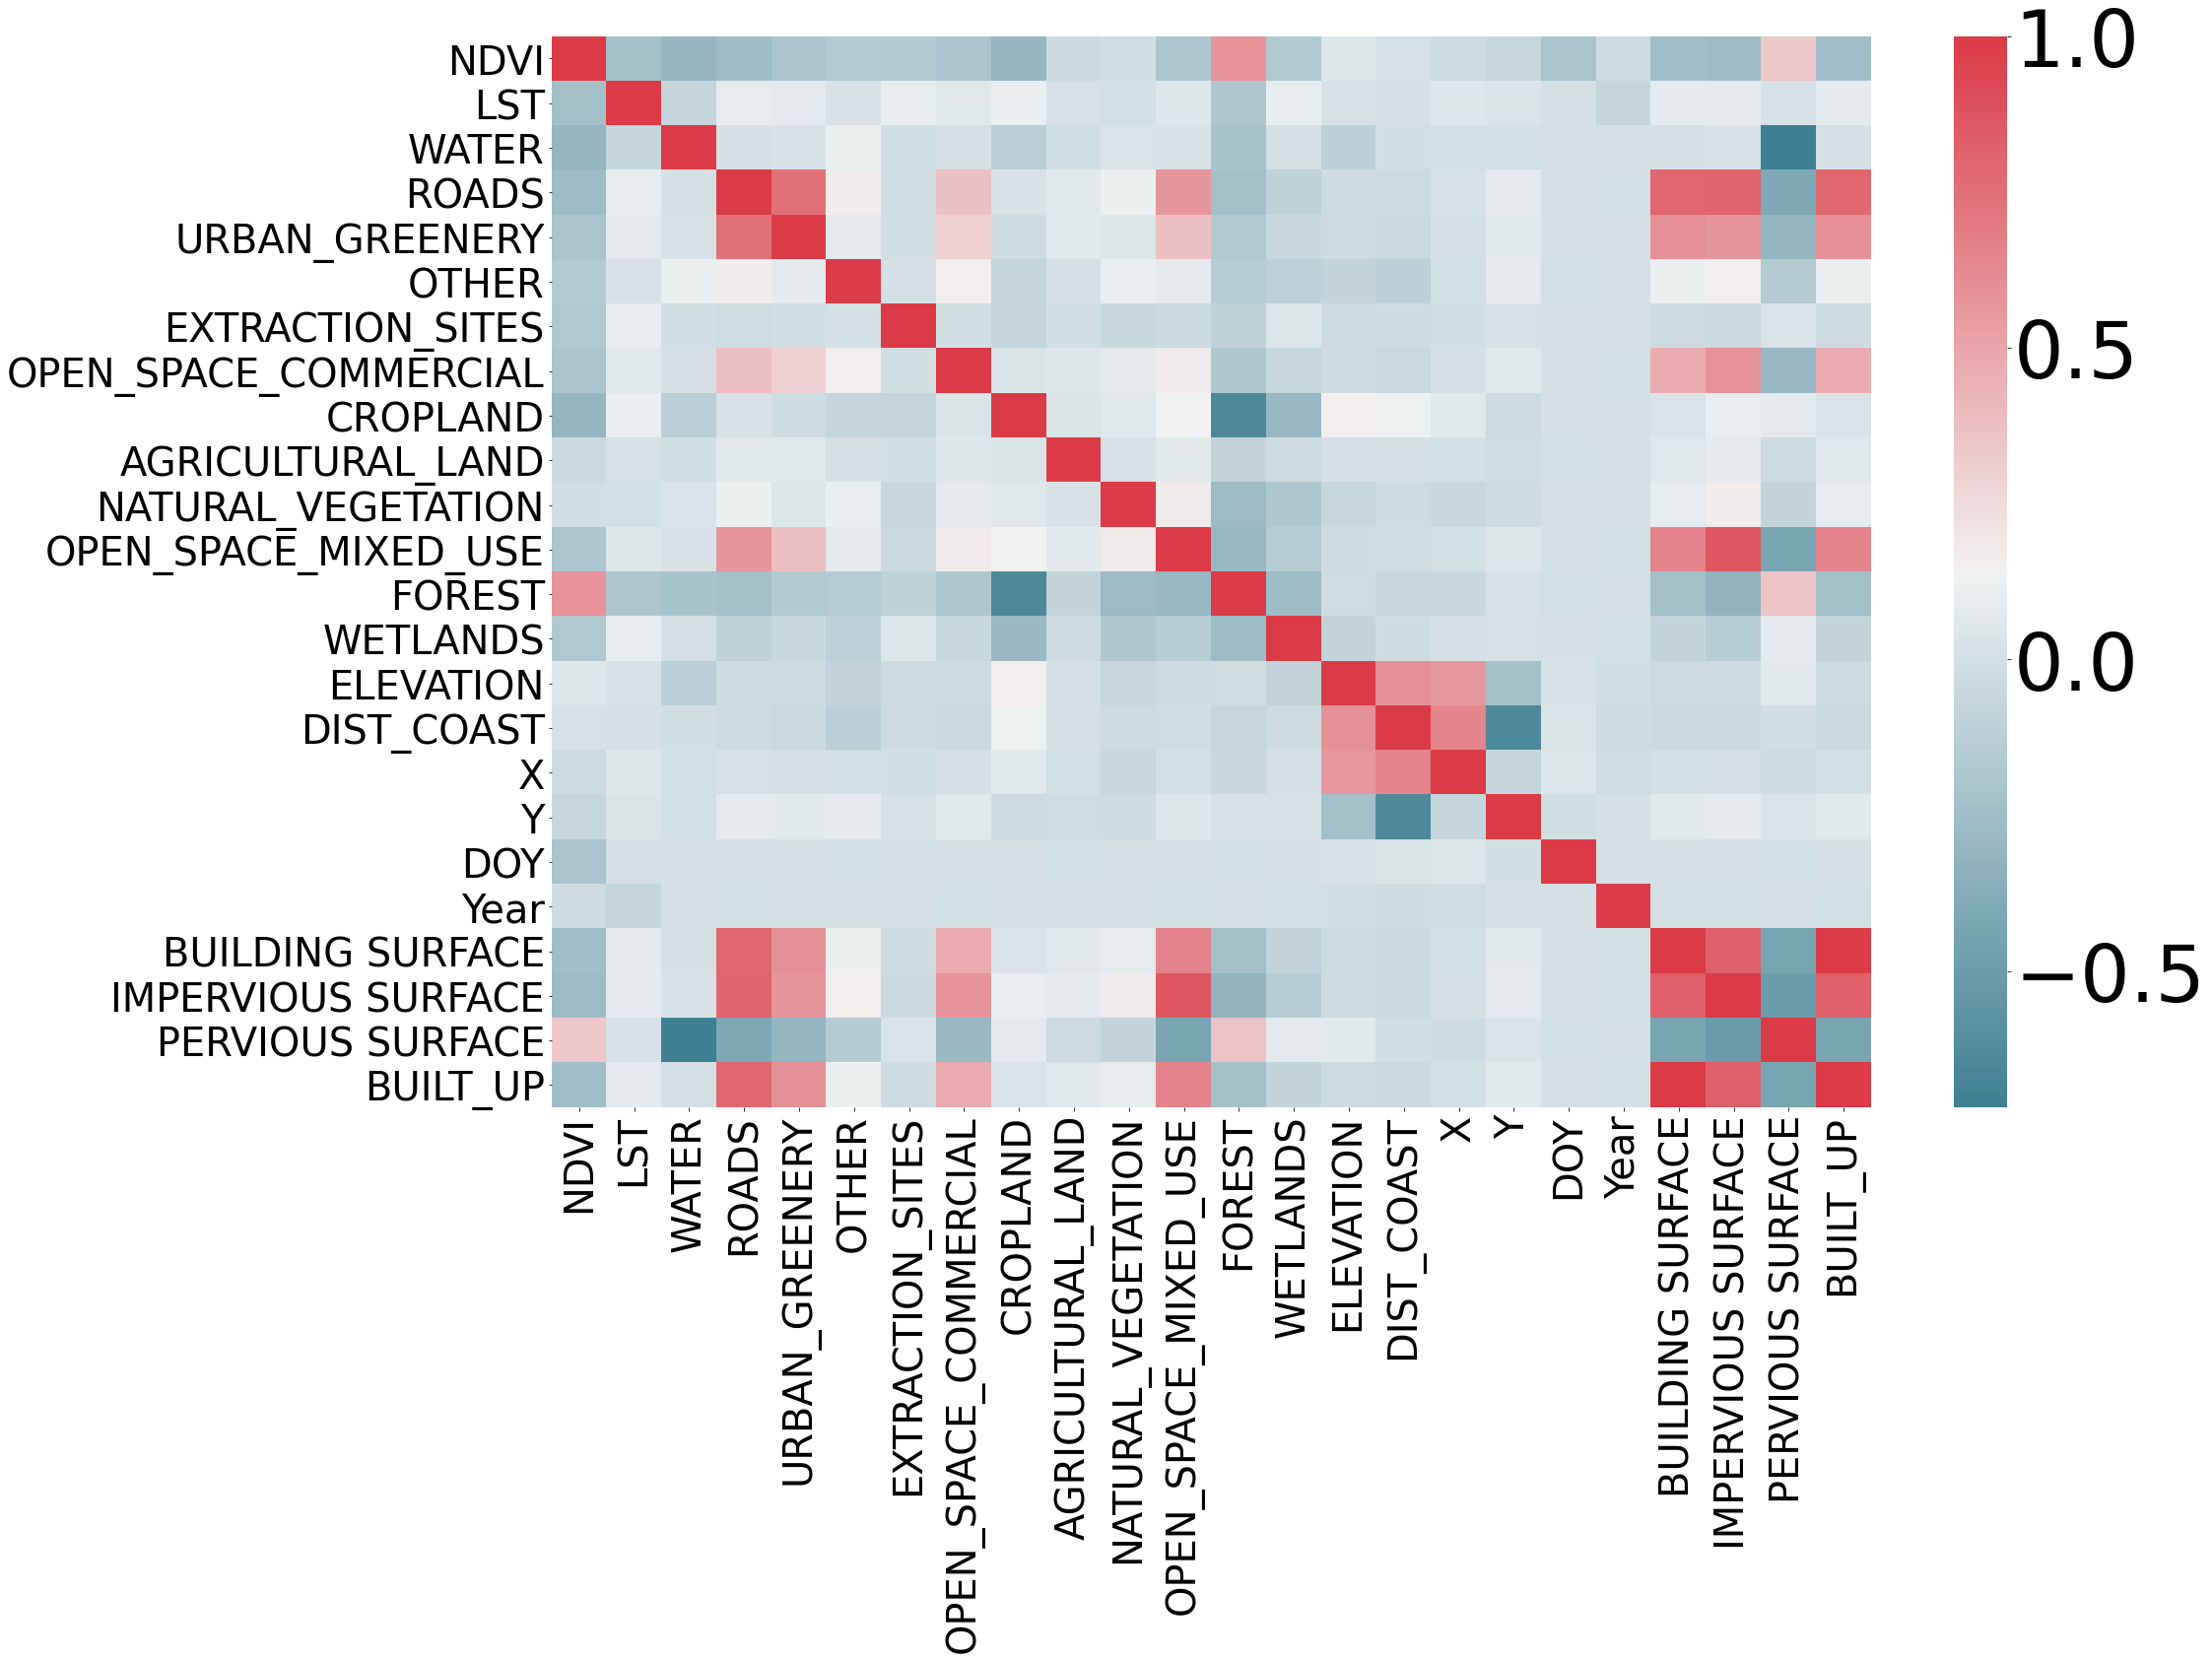

In [5]:
#feature Correlation
#plt.rcParams['figure.figsize'] = [120,110]
plt.figure(figsize=(30,20))
cor = data.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor, annot=False, cmap=cmap)#cmap="YlGnBu")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 40,rotation=90)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 40,rotation=360)
ax.figure.axes[-1].tick_params(labelsize=80)
#plt.savefig('correlation matrix_full.png',format='png')
plt.show()

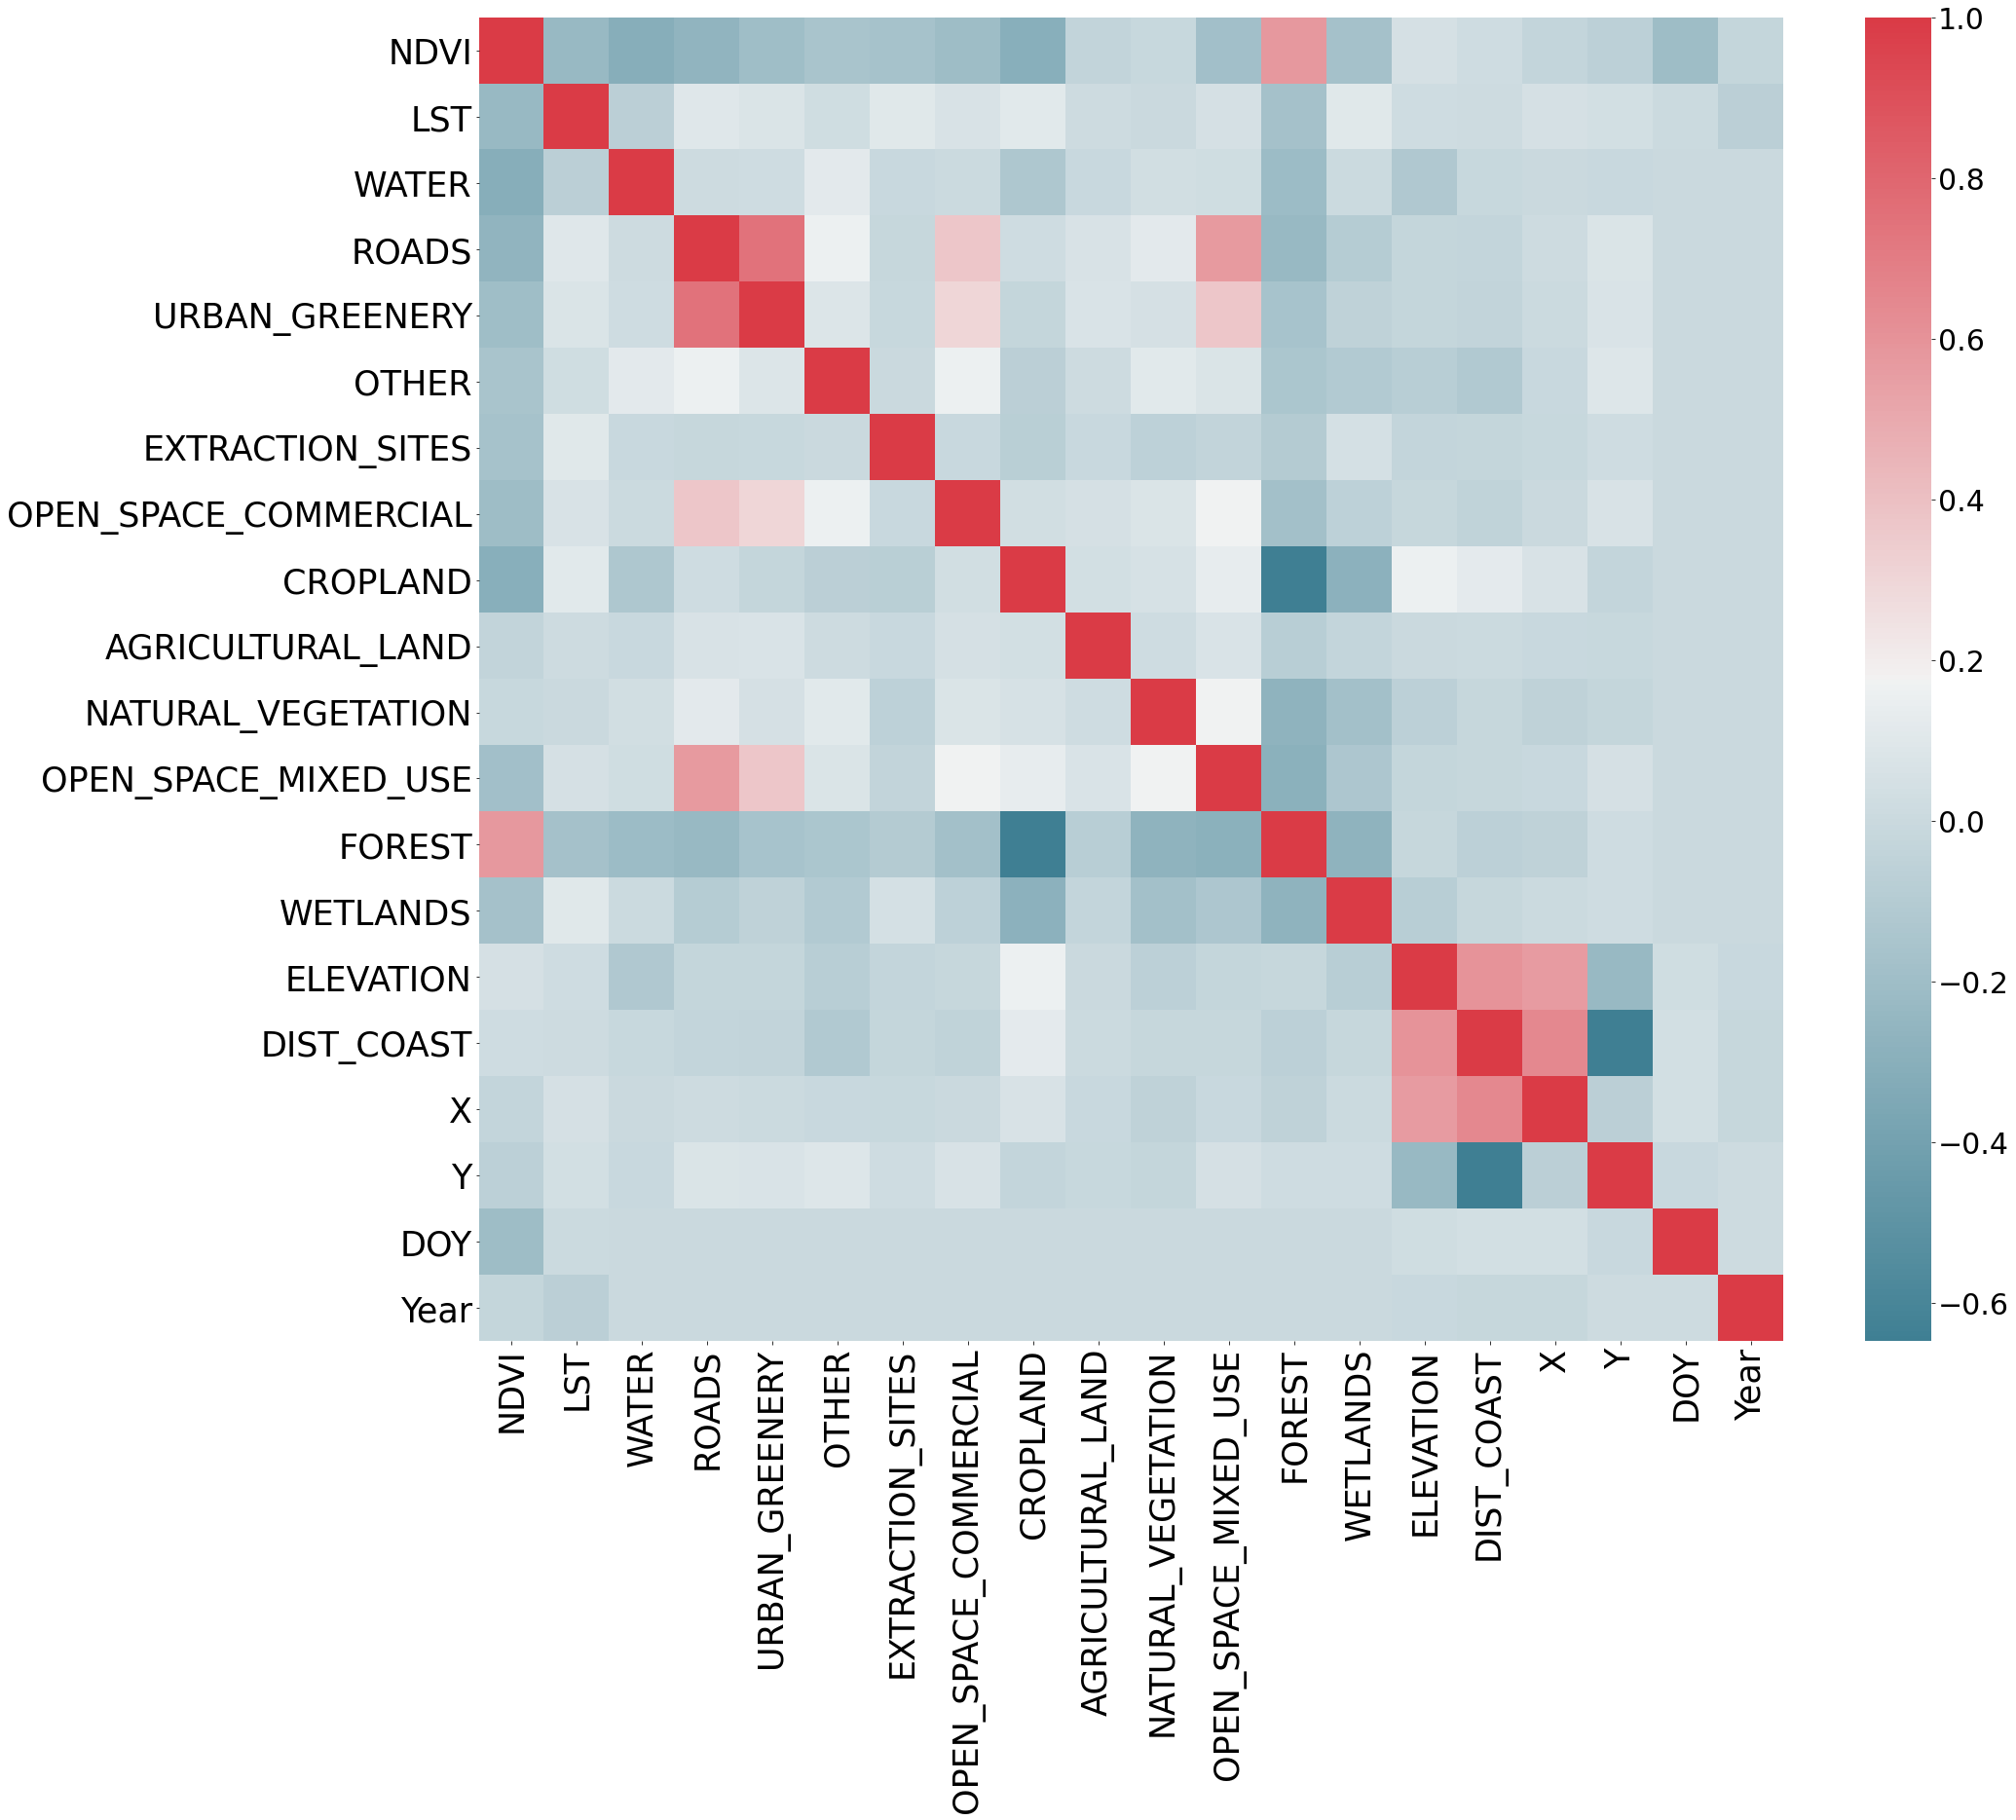

In [6]:
#feature Correlation
plt.figure(figsize=(30,25))
cor = data.drop(columns=['BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
                         'BUILT_UP']).corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor, annot=False, cmap=cmap,annot_kws={"fontsize":20})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 35, color ='black')
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 35)
ax.figure.axes[-1].tick_params(labelsize=30)
plt.savefig('correlation land use.png',format='png')
plt.show()

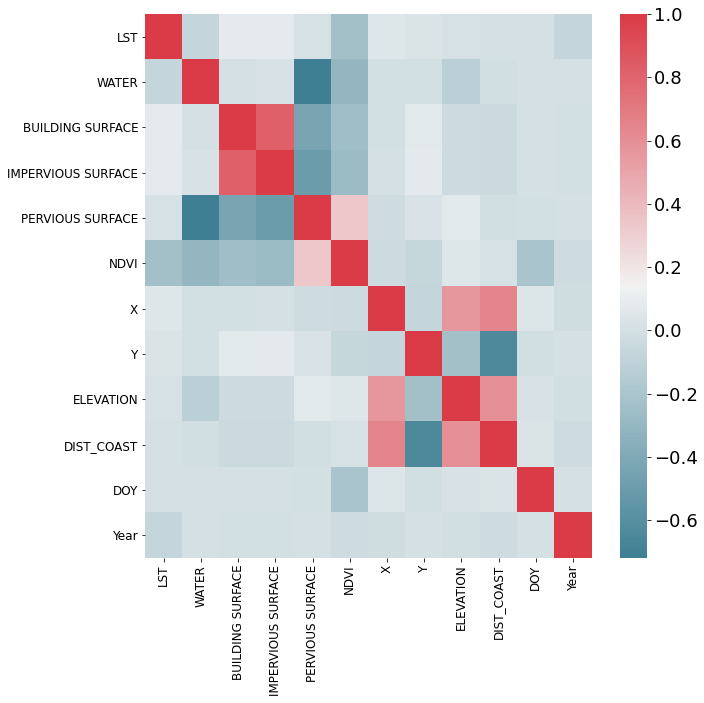

In [7]:
plt.figure(figsize=(10,10))
cor = data[['LST','WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE','NDVI','X','Y','ELEVATION','DIST_COAST','DOY','Year']].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(cor,annot=False, cmap=cmap,annot_kws={"fontsize":8})#cmap="YlGnBu")
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 12)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 12)
ax.figure.axes[-1].tick_params(labelsize=18)


#sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.savefig('correlation surfaces.png',format='png')
plt.show()

In [8]:
#linear regression baseline model

X=data.drop(columns=['GRD_INSPIR','LST','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
                         'BUILT_UP'
                    ]) #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4


#scale data 
scaler = StandardScaler()
X_train_a=scaler.fit_transform(X_train)
X_test_a=scaler.transform(X_test)




reg= LinearRegression()

model = reg.fit(X_train_a,y_train)

#get model coeff
for i, v in enumerate (model.coef_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.2f'%v))
    
    
predictions = model.predict(X_test_a)

print('\n''rmse linear reg model with ndvi: ', np.sqrt(mean_squared_error(y_test, predictions)))

print('\n''rmse linear reg model without ndvi training: ', np.sqrt(mean_squared_error(y_train, model.predict(X_train_a))))

print('R_sq train: ',model.score(X_train_a,y_train))

print('R_sq test: ',model.score(X_test_a,y_test))

Feature:NDVI Score: -0.80
Feature:WATER Score: -0.52
Feature:ROADS Score: 0.09
Feature:URBAN_GREENERY Score: 0.03
Feature:OTHER Score: -0.01
Feature:EXTRACTION_SITES Score: 0.16
Feature:OPEN_SPACE_COMMERCIAL Score: 0.00
Feature:CROPLAND Score: 0.02
Feature:AGRICULTURAL_LAND Score: 0.00
Feature:NATURAL_VEGETATION Score: 0.00
Feature:OPEN_SPACE_MIXED_USE Score: -0.06
Feature:FOREST Score: -0.15
Feature:WETLANDS Score: 0.15
Feature:ELEVATION Score: -0.02
Feature:DIST_COAST Score: 0.01
Feature:X Score: 0.15
Feature:Y Score: 0.07
Feature:DOY Score: -0.16
Feature:Year Score: -0.25

rmse linear reg model with ndvi:  3.13806171265002

rmse linear reg model without ndvi training:  3.1387635317501794
R_sq train:  0.09720595884252081
R_sq test:  0.09725637930278208


In [9]:
#linear regression baseline model

X=data[['WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
        'NDVI','X','Y','ELEVATION','DIST_COAST','DOY','Year']] #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4


#scale data 
scaler = StandardScaler()
X_train_a=scaler.fit_transform(X_train)
X_test_a=scaler.transform(X_test)




reg= LinearRegression()

model = reg.fit(X_train_a,y_train)

#get model coeff
for i, v in enumerate (model.coef_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.2f'%v))
    
    
predictions = model.predict(X_test_a)
print('\n''rmse linear reg model without ndvi: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('\n''rmse linear reg model without ndvi training: ', np.sqrt(mean_squared_error(y_train, model.predict(X_train_a))))

print('R_sq train: ',model.score(X_train_a,y_train))

print('R_sq test: ',model.score(X_test_a,y_test))

Feature:WATER Score: -0.57
Feature:BUILDING SURFACE Score: 0.08
Feature:IMPERVIOUS SURFACE Score: -0.07
Feature:PERVIOUS SURFACE Score: -0.02
Feature:NDVI Score: -0.98
Feature:X Score: 0.16
Feature:Y Score: 0.07
Feature:ELEVATION Score: -0.04
Feature:DIST_COAST Score: 0.02
Feature:DOY Score: -0.19
Feature:Year Score: -0.25

rmse linear reg model without ndvi:  3.148987311357365

rmse linear reg model without ndvi training:  3.149954546209929
R_sq train:  0.09075680004783604
R_sq test:  0.0909593812389129


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
X=data.drop(columns=['GRD_INSPIR','LST','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
                         'BUILT_UP']) #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4


#scale data 
#scaler = StandardScaler()
#X_train_a=scaler.fit_transform(X_train)
#X_test_a=scaler.fit_transform(X_test)

rf = RandomForestRegressor(criterion='mse',n_jobs=-1)

model = rf.fit(X_train,y_train)

for i, v in enumerate (model.feature_importances_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.2f'%v))
    
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

print('\n''rmse_train rf reg model: ', np.sqrt(mean_squared_error(y_train, predictions_train)))

print('\n''rmse_test rf reg model: ', np.sqrt(mean_squared_error(y_test, predictions_test)))

Feature:NDVI Score: 0.09
Feature:WATER Score: 0.02
Feature:ROADS Score: 0.01
Feature:URBAN_GREENERY Score: 0.00
Feature:OTHER Score: 0.01
Feature:EXTRACTION_SITES Score: 0.00
Feature:OPEN_SPACE_COMMERCIAL Score: 0.00
Feature:CROPLAND Score: 0.01
Feature:AGRICULTURAL_LAND Score: 0.00
Feature:NATURAL_VEGETATION Score: 0.01
Feature:OPEN_SPACE_MIXED_USE Score: 0.01
Feature:FOREST Score: 0.02
Feature:WETLANDS Score: 0.01
Feature:ELEVATION Score: 0.03
Feature:DIST_COAST Score: 0.05
Feature:X Score: 0.09
Feature:Y Score: 0.05
Feature:DOY Score: 0.53
Feature:Year Score: 0.06

rmse_train rf reg model:  0.46997470270288577

rmse_test rf reg model:  1.2585048105133847


In [12]:
print('rf reg model R_sq: ',model.score(X_train,y_train))

print('rf reg model R_sq: ',model.score(X_test,y_test))

rf reg model R_sq:  0.9797595365951914
rf reg model R_sq:  0.8548051448500897


In [14]:
X=data[['WATER','BUILDING SURFACE','IMPERVIOUS SURFACE','PERVIOUS SURFACE',
        'NDVI','X','Y','ELEVATION','DIST_COAST','DOY','Year']] #select columns for learning drop the target-> lst and the IDs -> GRD_INSPIR
y= data['LST'] #target variable

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4, random_state = 0) #split with train size 0.4


#scale data 
#scaler = StandardScaler()
#X_train_a=scaler.fit_transform(X_train)
#X_test_a=scaler.fit_transform(X_test)

rf = RandomForestRegressor(criterion='mse',n_jobs=-1)

model = rf.fit(X_train,y_train)

for i, v in enumerate (model.feature_importances_):
    print ('Feature:{s} Score: {c}'.format(s=X_train.columns[i],c='%.2f'%v))
    
predictions_test = model.predict(X_test)
predictions_train = model.predict(X_train)

print('\n''rmse_train rf reg model_surfaces: ', np.sqrt(mean_squared_error(y_train, predictions_train)))

print('\n''rmse_test rf reg model_surfaces: ', np.sqrt(mean_squared_error(y_test, predictions_test)))


print('rf reg model_surfaces R_sq: ',model.score(X_train,y_train))

print('rf reg model_surfaces R_sq: ',model.score(X_test,y_test))

Feature:WATER Score: 0.02
Feature:BUILDING SURFACE Score: 0.01
Feature:IMPERVIOUS SURFACE Score: 0.01
Feature:PERVIOUS SURFACE Score: 0.01
Feature:NDVI Score: 0.10
Feature:X Score: 0.10
Feature:Y Score: 0.06
Feature:ELEVATION Score: 0.04
Feature:DIST_COAST Score: 0.06
Feature:DOY Score: 0.53
Feature:Year Score: 0.06

rmse_train rf reg model_surfaces:  0.46073159329664265

rmse_test rf reg model_surfaces:  1.234126615362349
rf reg model_surfaces R_sq:  0.9805478560293678
rf reg model_surfaces R_sq:  0.8603757334151465
